In [59]:
import torch
# from Define_Model.ResNet import LocalResNet
# from Define_Model.Loss.SoftmaxLoss import AdditiveMarginLinear
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
# import Process_Data.constants as c
import pickle
import matplotlib
import torchaudio
from torch.nn import functional as F
from scipy.io import wavfile
import random

%matplotlib inline

In [2]:
grad_dir = '/Users/yang/PycharmProjects/SpeakerVerification-pytorch/Data/Data/gradient'
x = np.arange(161) * 8000 / (161 - 1)
y = np.arange(81) * 8000 / 80
z = np.arange(21) * 8000 / 20

In [34]:
relu_mean6 = np.load(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_grad/123456/relu_mean/train.grad.npy')
relu_mean7 = np.load(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_grad/123457/relu_mean/train.grad.npy')
relu_mean8 = np.load(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_grad/123458/relu_mean/train.grad.npy')

relu_mean_input_thin34 = []
for seed in [123456, 123457, 123458]:
    relu_mean_input_thin34.append(np.load(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_input/%d/relu_mean/train.grad.npy'%seed))

print(len(relu_mean_input_thin34))
relu_mean_input_thin10 = []

for seed in [123456, 123457, 123458]:
    relu_mean_input_thin10.append(np.load(grad_dir + '/ThinResNet10/vox1/klsp_egs_rvec_mean/acc_input/%d/relu_mean/train.grad.npy'%seed))
print(len(relu_mean_input_thin10))


3
3


In [59]:
relu_mean_input_thin34_v2 = []
for seed in [123456]:
    relu_mean_input_thin34_v2.append(np.load(grad_dir + '/ThinResNet34/vox2/arcsoft_sgd_rop/acc_input/%d/relu_mean/train.grad.npy'%seed))

relu_mean_input_thin34_v2_w = []
for seed in [123456]:
    relu_mean_input_thin34_v2_w.append(np.load(grad_dir + '/ThinResNet34/vox2/arcsoft_sgd_rop/acc_input/%d/relu_mean_lw/train.grad.npy'%seed))


In [ ]:
plt.figure(figsize=(12, 6))
plt.rc('font', family='Times New Roman')
plt.xlabel('Frequency (Hz)', fontsize=24)
plt.xticks(fontsize=22)
plt.ylabel('Weight', fontsize=24)
plt.yticks(fontsize=22)


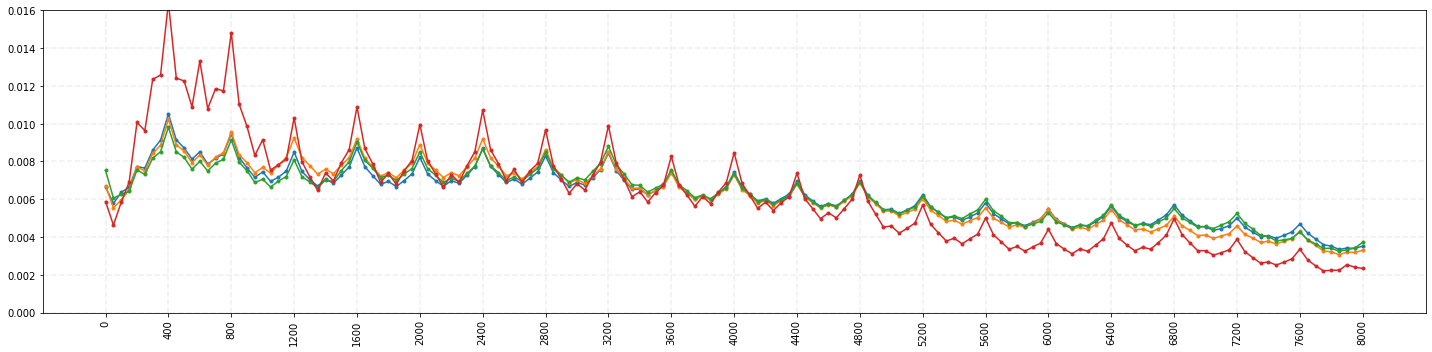

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(x, relu_mean6/relu_mean6.sum(), marker='.')
plt.plot(x, relu_mean7/relu_mean7.sum(), marker='.')
plt.plot(x, relu_mean8/relu_mean8.sum(), marker='.')
plt.plot(x, relu_mean6_var/relu_mean6_var.sum(), marker='.')
plt.plot(x, relu_mean6_input/relu_mean6_input.sum(), marker='.')

plt.xticks(z, rotation=90)
plt.ylim(0.000, 0.016)

plt.grid(linestyle='--', axis='both', alpha=0.2, linewidth=1.5)
plt.tight_layout()
plt.show()

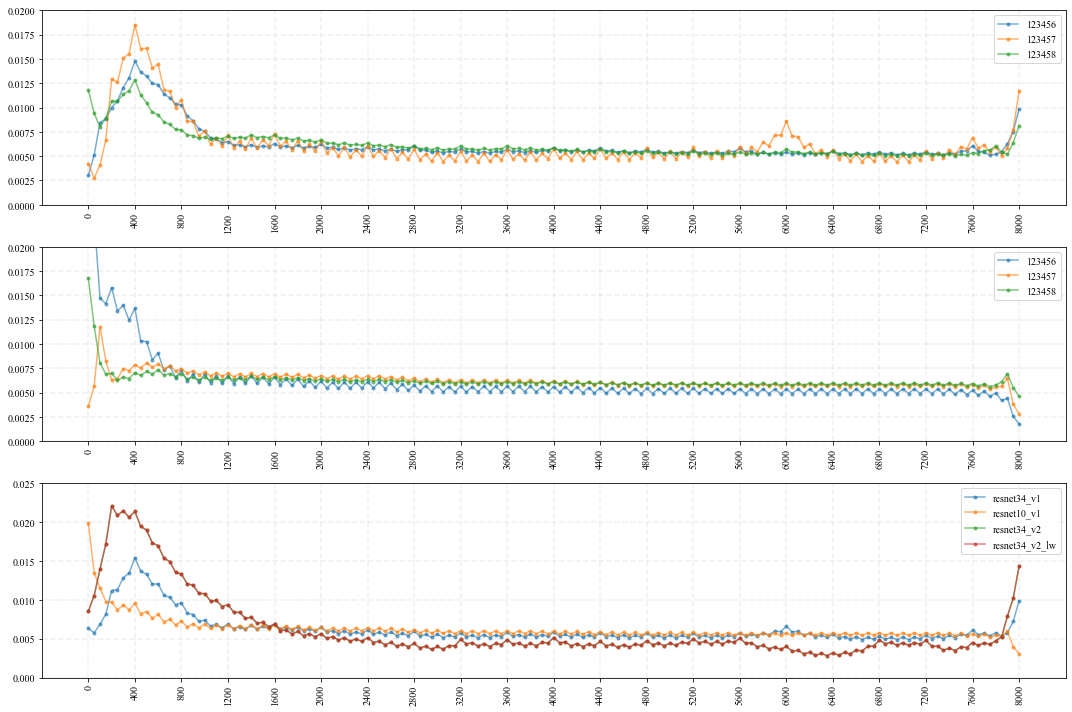

In [61]:
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
alpha=0.6
for w in relu_mean_input_thin34:
    plt.plot(x, w/w.sum(), marker='.', alpha=alpha)
plt.legend(['123456', '123457', '123458']) 

plt.xticks(z, rotation=90)
plt.grid(linestyle='--', axis='both', alpha=0.2, linewidth=1.5)
plt.ylim(0.000, 0.02)

plt.tight_layout() 

plt.subplot(3,1,2)
for w in relu_mean_input_thin10:
    plt.plot(x, w/w.sum(), marker='.', alpha=alpha)
plt.legend(['123456', '123457', '123458']) 

plt.xticks(z, rotation=90)
plt.ylim(0.000, 0.02)

plt.grid(linestyle='--', axis='both', alpha=0.2, linewidth=1.5)
plt.tight_layout()

plt.subplot(3,1,3)
for w in [relu_mean_input_thin34, relu_mean_input_thin10, relu_mean_input_thin34_v2, relu_mean_input_thin34_v2_w]:
    w = np.mean(w, axis=0)
    plt.plot(x, w/w.sum(), marker='.', alpha=alpha)
plt.legend(['resnet34_v1', 'resnet10_v1', 'resnet34_v2', 'resnet34_v2_lw']) 
plt.xticks(z, rotation=90)
plt.ylim(0.000, 0.025)

plt.grid(linestyle='--', axis='both', alpha=0.2, linewidth=1.5)
plt.tight_layout()
plt.show()

In [6]:
with open(grad_dir + '/ThinResNet34/vox1/klsp_egs_rvec_mean/acc_grad/123456/relu_mean/freq.data.pickle', 'rb') as f:
    relu_mean6_freq_data = pickle.load(f)
    
relu_mean6_var = relu_mean6_freq_data['train.time.var']

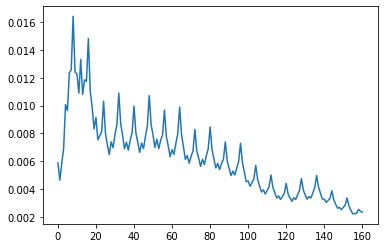

In [8]:
plt.plot(relu_mean6_var/relu_mean6_var.sum())

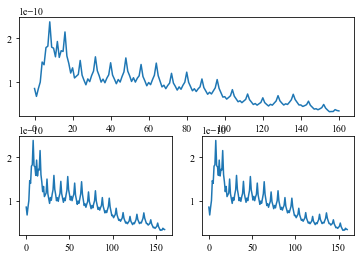

In [55]:
plt.rc('font', family='Times New Roman')

plt.subplot(2,1,1)
plt.plot(relu_mean6_var)

plt.subplot(2,2,3)
plt.plot(relu_mean6_var)
plt.subplot(2,2,4)
plt.plot(relu_mean6_var)



In [54]:
fnames = [f.name for f in matplotlib.font_manager.fontManager.ttflist]

print(fnames)

['ITC Bookman', 'Palatino', 'Symbol', 'Helvetica', 'New Century Schoolbook', 'Helvetica', 'Times', 'Helvetica', 'Courier', 'Utopia', 'Courier', 'Courier', 'Utopia', 'Courier', 'Helvetica', 'Courier', 'Computer Modern', 'Helvetica', 'New Century Schoolbook', 'Times', 'New Century Schoolbook', 'Helvetica', 'Times', 'Helvetica', 'Utopia', 'Helvetica', 'Helvetica', 'ITC Avant Garde Gothic', 'Times', 'ITC Zapf Chancery', 'Palatino', 'Symbol', 'Computer Modern', 'Times', 'ITC Bookman', 'ITC Bookman', 'Computer Modern', 'Helvetica', 'Helvetica', 'ITC Bookman', 'Computer Modern', 'Courier', 'Computer Modern', 'Helvetica', 'Times', 'ITC Avant Garde Gothic', 'Helvetica', 'Palatino', 'New Century Schoolbook', 'Palatino', 'Courier', 'Times', 'ZapfDingbats', 'Times', 'Helvetica', 'ITC Zapf Dingbats', 'ITC Avant Garde Gothic', 'ITC Avant Garde Gothic', 'Utopia', 'Courier']


In [ ]:
matplotlib.font_manager.fontManager.addfont('/home/yangwenhao/Times-New-Roman.ttf')

In [25]:
cams = []
for cam in ['GradCAMpp', 'ScoreCAM', 'LayerCAM']:
    this_cam = np.load('/home/work2020/yangwenhao/project/reliable-visualization-for-deep-speaker-recognition/egs/voxceleb/visualization/single/salient_np_vad/%s/layer4/%s/%s_pic_0.npy'%(cam, cam, cam), allow_pickle=True)
    
    print(this_cam[0].shape[0]/80)
    cams.append(this_cam)
    
# plt.imshow(score_cam_0)

455.0
455.0
455.0


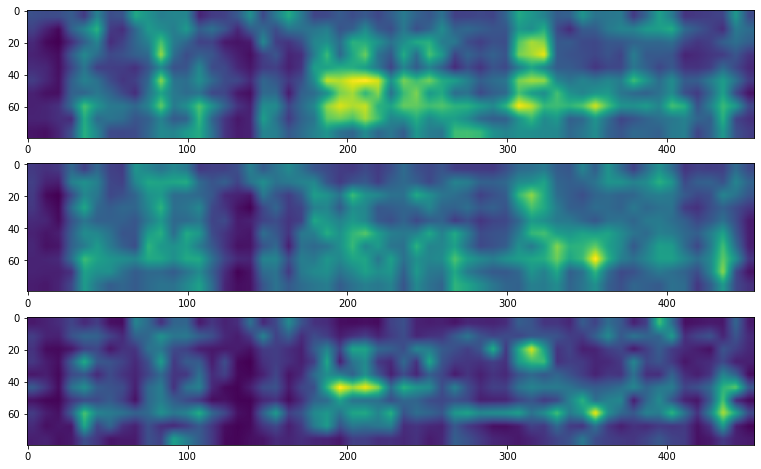

In [22]:
plt.figure(figsize=(15, 8))

for i in range(len(cams)):
    plt.subplot(len(cams), 1, i+1)
    plt.imshow(cams[i][0].reshape(80, -1))

In [67]:
np_cam = np.array(cams[0])    

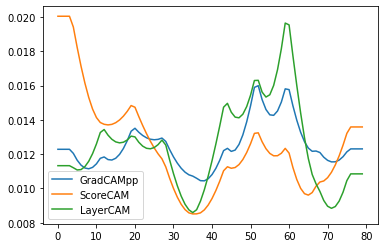

In [57]:
max_frames = 0
for cam in cams: 
    np_cams = np.array(cam)
    ws = []
    for c in np_cams:
        ws.append(c.reshape(80, -1).mean(axis=1))
        max_frames = max(c.reshape(80, -1).shape[1], max_frames)

    ws = np.array(ws)
    plt.plot(ws.std(axis=0)/ws.std(axis=0).sum())
    
plt.legend(['GradCAMpp', 'ScoreCAM', 'LayerCAM'])

In [64]:
trans = torch.nn.Sequential(
    PreEmphasis(),
    torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft=512,
                                         win_length=400, hop_length=160, window_fn=torch.hamming_window, n_mels=80))

In [60]:
def loadWAV(filename, max_frames, evalmode=False, num_eval=10):
    # Maximum audio length
    max_audio = max_frames * 160 + 240
    # Read wav file and convert to torch tensor
    sample_rate, audio  = wavfile.read(filename)
    audiosize = audio.shape[0]

    # padding
    if audiosize <= max_audio:
        shortage = max_audio - audiosize + 1
        audio = np.pad(audio, (0, shortage), 'wrap')
        audiosize = audio.shape[0]

    if evalmode:
        startframe = np.linspace(0, audiosize-max_audio, num=num_eval)
    else:
        startframe = np.array([np.int64(random.random()*(audiosize-max_audio))])

    feats = []
    if evalmode and max_frames == 0:
        feats.append(audio)
    else:
        for asf in startframe:
            feats.append(audio[int(asf):int(asf)+max_audio])
    feat = np.stack(feats, axis=0).astype(float)
    return feat

class PreEmphasis(torch.nn.Module):

    def __init__(self, coef: float = 0.97):
        super().__init__()
        self.coef = coef
        # make kernel
        # In pytorch, the convolution operation uses cross-correlation. So, filter is flipped.
        self.register_buffer(
            'flipped_filter', torch.FloatTensor([-self.coef, 1.]).unsqueeze(0).unsqueeze(0)
        )

    def forward(self, inputs: torch.tensor) -> torch.tensor:
        assert len(inputs.size()) == 2, 'The number of dimensions of inputs tensor must be 2!'
        # reflect padding to match lengths of in/out
        inputs = inputs.unsqueeze(1)
        inputs = F.pad(inputs, (1, 0), 'reflect')
        return F.conv1d(inputs, self.flipped_filter).squeeze(1)

In [61]:
x = torch.FloatTensor(loadWAV('/home/storage/yangwenhao/dataset/voxceleb2/dev/aac/id01558/DqQPaZFmGlA/00010.wav', max_frames)) 

In [66]:
trans(x).shape

torch.Size([1, 80, 1571])

In [69]:
np_cam[0].reshape(80, -1).shape

(80, 455)